In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#!/usr/bin/env python2
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.misc import imread

In [6]:
os.chdir('/Users/Bya/git/predictEPL/')
from MyFunctions import dataIO

In [7]:
def CSVreturnDF(filepathName, listHeaderNames):
    # read file as dataframe, and add 'side' column that shows which team's tweet it is 
    dfTweets = pd.read_csv(filepathName, header=None, names=listHeaderNames)
    return dfTweets

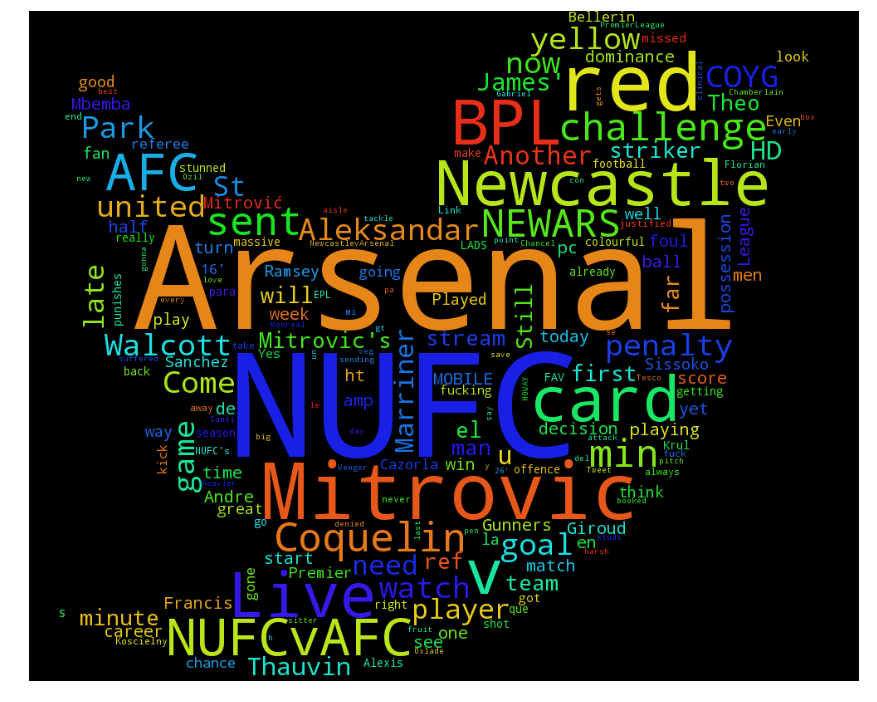

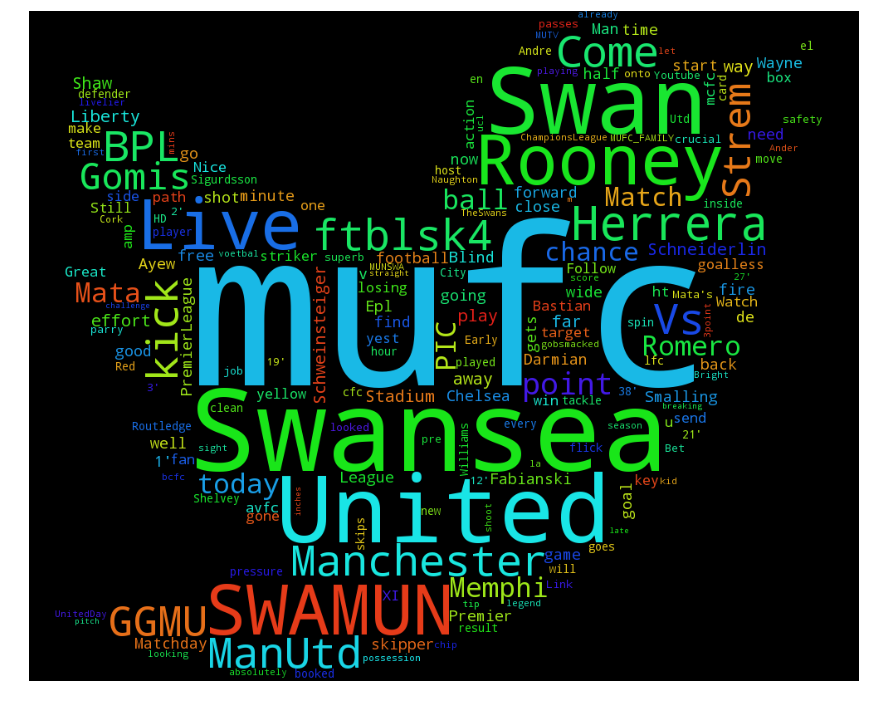

In [85]:
loadFileNameGW4 = ["/Users/Bya/Dropbox/Research/datas/GW4/1508292045_NUFCvsARSENAL_json.txt.csv",
                   
#                    "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   
#                    "/Users/Bya/Dropbox/Research/datas/GW4/1508302130_SAINTSvsNCFC_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508310000_SWANSvsMUFC_json.txt.csv",]

for i in range(len(loadFileNameGW4)):
    dfTweets = dataIO.CSVreturnDF(loadFileNameGW4[i], ['date', 'text', 'user', 'tags'])
    # join tweets to a single string
    words = ' '.join(dfTweets['text']).decode('utf-8')

    # remove URLs, RTs, and twitter handles
    no_urls_no_tags = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])

    Wordle(no_urls_no_tags)

In [9]:
import tweepy
import csv

import os
import sys

path = str(os.path.expanduser('~')) + '/git'
sys.path.append(path)
import twitter_api_tokens as tokens

#Twitter API credentials
consumer_key = tokens.consumer_key
consumer_secret = tokens.consumer_secret
access_key = tokens.access_token
access_secret = tokens.access_token_secret

In [11]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
	
	#authorize twitter, initialize tweepy
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	
	#initialize a list to hold all the tweepy Tweets
	alltweets = []	
	
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	
	#save most recent tweets
	alltweets.extend(new_tweets)
	
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1
	
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		print "getting tweets before %s" % (oldest)
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
		
		print "...%s tweets downloaded so far" % (len(alltweets))
	
	#transform the tweepy tweets into a 2D array that will populate the csv	
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
	
	#write the csv	
	with open('%s_tweets.csv' % screen_name, 'wb') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text"])
		writer.writerows(outtweets)
	
	pass

In [84]:
#pass in the username of the account you want to download
get_all_tweets("TsogtgerelB")

getting tweets before 654289146907750399
...400 tweets downloaded so far
getting tweets before 653893110791995391
...600 tweets downloaded so far
getting tweets before 653515809122181120
...800 tweets downloaded so far
getting tweets before 653184964175921151
...999 tweets downloaded so far
getting tweets before 652400224107761663
...1199 tweets downloaded so far
getting tweets before 652115198862426111
...1397 tweets downloaded so far
getting tweets before 651724406259974147
...1595 tweets downloaded so far
getting tweets before 651441016361254911
...1794 tweets downloaded so far
getting tweets before 650900357007085567
...1994 tweets downloaded so far
getting tweets before 650659579584385023
...2194 tweets downloaded so far
getting tweets before 649954002898190335
...2394 tweets downloaded so far
getting tweets before 649550889498206208
...2593 tweets downloaded so far
getting tweets before 649268864514170880
...2792 tweets downloaded so far
getting tweets before 648373459500662784
.

In [86]:
def Wordle(text):
    twitter_mask = imread('/Users/Bya/git/predictEPL/Wordle/twitter_mask.png', flatten=True)
#     more_stopwords = {'oh', 'will', 'hey', 'yet', ...}
    more_stopwords = [ 
        u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', 
        u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',
        u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',
        u'の', u'が', u'と', u'た', u'し', u'で',
        u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', 
        u'の急上昇ワードランキング',
        
        u'', u'юм', u'шүү', u'нь', u'байна', u'гэж', u'уу', u'үү', u'бол', u'байгаа', u'биш', u'л', 
        u'ч', u'дээ', u'гэсэн', u'гэдэг', u'бол', u'энэ', u'байх', u'ээ', u'биз', u'вэ', u'байж', 
        u'юу', u'билээ', u'чинь', u'шиг', u'аа', u'д', u'бна',
        u'шд', u'ш', u'бга', u'байхад', u'үед', u'лээ', u'дээр', u'гээд', u'болж', u'ын', u'ыг', u'бас', u'нтр', 
        u'руу', u'уг', u'бэ', u'байгаад', u'болох', u'ямар', u'даа', u'юмсан', u'байхдаа', u'ер', u'авч', u'гарч',
        u'яаж', u'гэж', u'юмаа', u'бх', u'ингэж', u'харин', u'тай', u'хийж', u'бсан', u'лав', u'хаха', u'хэхэ', u'гээд', 
        u'байсан', u'тэгэхдээ', u'тэр', u'байгаан', u'аан', u'дахь',u'байсын', u'тэгээд', u'талаар', u'байгаан', 
        u'болохоор', u'байнаа', u'ийм', u'дээрээ', u'байдаг', u'хийх', u'нээрээ', u'эсвэл', u'аваад', u'бодож', u'бодоод',
        u'орж', u'хийсэн', u'зүгээр', u'тийм', u'авах', u'ийн',
        
        u'bn', u'n', u'l', u'ba', u'da', u'bh', u'p', u'der', u'de', u'dee', u'geed', 
        u'gd', u'ene', u'bol', u'bzde', u'ug', u'bsan', u'baisan', u'sh', u'shde', u'ba', u'za', 
        u'shu', u'shuu', u'g', u'v', u'd', u'tgd', u'tgeed', u's', u'chin', u'yum', u'yumu',
        u'v', u'g', u'shd', u'shde', u'bj', u'bje', u'nre', u'neeree', u'ter', u'ene', u'zgr',
        u'zgre', u'bhgu', u'bolj', u'gj', u'hu', u'yum', u'yum', u'u', u've', u'te', 'a',
        u'nre', u'haha', u'bas', u'ch', u'yu', u'bga', u'ged', u'bnle', u'harin', u'gsn', 
        u'yag', u'kk', u'ntr', u'gej', u'tiim', u'ih',
        u'nere', u'ni', u'shig', u'yumaa', u'shg', u'bgad', u'ho', u'via', u'aimr', u'bur', 
        u'bha', u'hij', u'yur', u'odo', u'ghde', u'bhda', u'gsn', u'bsin', u'oo', u'bish', 
        u'aa', u'ingej', u'bhad', u'bgan', u'shude', u'iim', u't', u'nar', u'yasan', u'higed',
        u'unher', u'dere', u'aanha', u'aan', u'gsen', u'uu', u'blhor', u'hen', u'yostoi', 
        u'bloh', u'shud', u'bdag', u'bwal', u'blhor', u'ss', u'bna', 
        u'baina', u'iin', u'baigaa', u'gesen', u'chini', u'zugeer', u'bishuu', u'deer', u'uur', u'baih',  
        u'yamar', u'daa', u'baigaad', u'yumuu', u'tegehdee', u'ee', u'ii',
        
        u'sleipnir'
    
    
    ]
    
    STOPWORDSS = STOPWORDS.union(more_stopwords)
    wordcloud = WordCloud(background_color="black", \
                          width=900, \
                          height=500, \
#                           font_path='/Library/Fonts/CabinSketch-Bold.ttf',\
#                           font_path='/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc',\
                          stopwords=STOPWORDSS,\
                          mask=twitter_mask\
                         ).generate(text)
    
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
    plt.show()

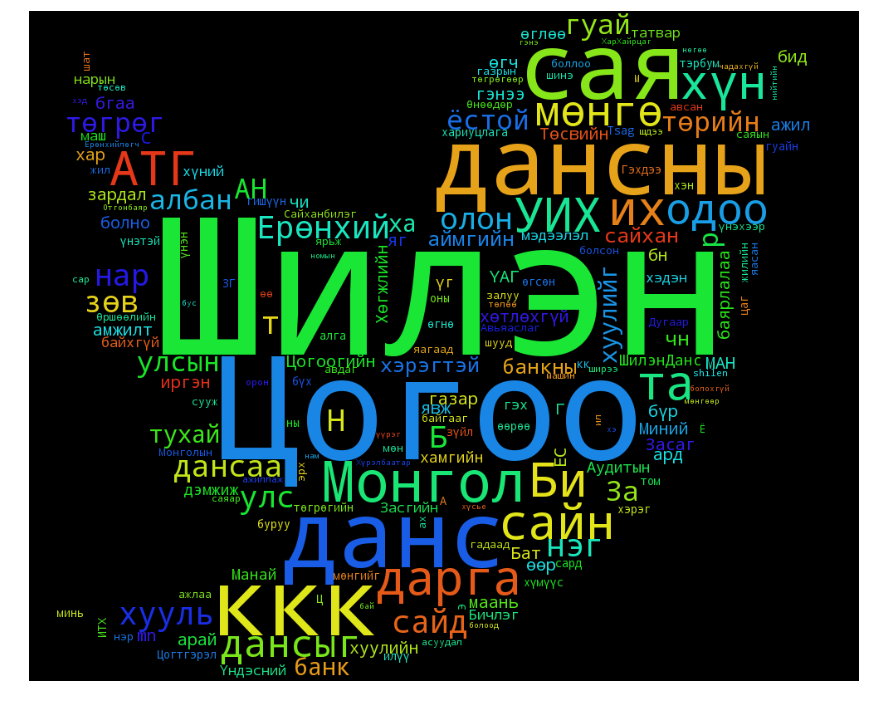

In [87]:
# filepathName = "/Users/Bya/git/predictEPL/byambaa_swiss_tweets.csv"

# filepathName = "/Users/Bya/git/predictEPL/batchunag_tweets.csv"

# filepathName = "/Users/Bya/git/predictEPL/orgil__tweets.csv"

# filepathName = "/Users/Bya/git/predictEPL/amarzana_tweets.csv"

# filepathName = "/Users/Bya/git/predictEPL/Barbayar_tweets.csv"

filepathName = "/Users/Bya/git/predictEPL/TsogtgerelB_tweets.csv"


dfTweets = pd.read_csv(filepathName, header=None, names=['id', 'created_at','text'])
# join tweets to a single string
words = ' '.join(dfTweets['text']).decode('utf-8')

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

Wordle(no_urls_no_tags)